In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

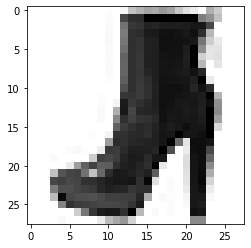

In [3]:
image, label = next(iter(trainloader))
plt.imshow(image[0][0],cmap = 'binary')

In [4]:
image.shape

torch.Size([64, 1, 28, 28])

In [5]:
len(trainloader)

938

In [30]:
# implementing a nn model

In [6]:
import torch.nn.functional as F

In [7]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_one = nn.Linear(784,256)
        self.hidden_two = nn.Linear(256,128)
        self.hidden_three = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view((x.shape[0],-1))
        x = F.relu(self.hidden_one(x))
        x = F.relu(self.hidden_two(x))
        x = F.relu(self.hidden_three(x))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x
    

In [8]:
model = Network()

In [9]:
model

Network(
  (hidden_one): Linear(in_features=784, out_features=256, bias=True)
  (hidden_two): Linear(in_features=256, out_features=128, bias=True)
  (hidden_three): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
from torch import optim

In [22]:
epochs = 30
optimizer = optim.Adam(model.parameters(),lr = 0.003)
criterion = nn.NLLLoss(reduction = 'sum')
training_loss, testing_loss = [],[]

for i in range(epochs):
    total_train_loss = 0
    train_correct = 0
    for images,labels in trainloader:
        
        outputs = model(images)
        ps = torch.exp(outputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs,labels)
        loss.backward()
        
        optimizer.step()
        total_train_loss += loss.item()
        
        top_p, top_class = ps.topk(1, dim = 1)
        match = top_class == labels.view(*top_class.shape)

        train_correct += match.sum().item()
                
    else:     
        
        # Figure out the testing loss and accuracy
        
        total_test_loss = 0
        test_correct = 0
        
        with torch.no_grad():
            
            for images, labels in testloader:
                outputs = model(images)
                ps = torch.exp(outputs)
                
                loss = criterion(outputs,labels)
                total_test_loss += loss.item()
                
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)

                test_correct += equals.sum().item()
                
    tr_loss = total_train_loss/len(trainloader.dataset)
    ts_loss = total_test_loss/len(testloader.dataset)
            
    training_loss.append(tr_loss)
    testing_loss.append(ts_loss)
    
    print('Train loss', tr_loss)
    print('Test loss',ts_loss)
    
    print('Train accuracy: ',train_correct/len(trainloader.dataset))
    print('Test accuracy: ',test_correct/len(testloader.dataset))
        
    
        
        
        
        
        
        
        
        

Train loss 0.19269549735387168
Test loss 0.45473487004041674
Train accuracy:  0.9317
Test accuracy:  0.879
Train loss 0.17780739059646924
Test loss 0.46306358728408814
Train accuracy:  0.9355166666666667
Test accuracy:  0.8703
Train loss 0.17470461208025614
Test loss 0.4560148114681244
Train accuracy:  0.93615
Test accuracy:  0.8788
Train loss 0.17509258954326312
Test loss 0.464596743452549
Train accuracy:  0.93575
Test accuracy:  0.8812
Train loss 0.1836672403395176
Test loss 0.45999529485702517
Train accuracy:  0.9356666666666666
Test accuracy:  0.8768
Train loss 0.17404704525967438
Test loss 0.44007704305648804
Train accuracy:  0.9379
Test accuracy:  0.8828
Train loss 0.1641283760726452
Test loss 0.40855407593250276
Train accuracy:  0.9399833333333333
Test accuracy:  0.8847
Train loss 0.1697869221329689
Test loss 0.4438884053468704
Train accuracy:  0.938
Test accuracy:  0.8767
Train loss 0.1713902193903923
Test loss 0.444561328125
Train accuracy:  0.9373833333333333
Test accuracy:  

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Plot training and testing losses

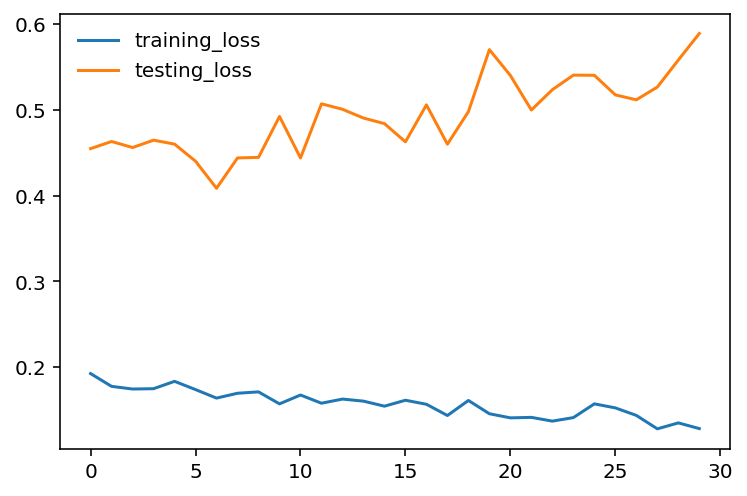

In [25]:
plt.plot(training_loss, label = 'training_loss')
plt.plot(testing_loss, label = 'testing_loss')
plt.legend(frameon = False)

In [ ]:
# The training loss keeps decreasing while the testing loss keeps increasing
# This is a clear sign of overfitting.

In [ ]:
## Clearly, by looking at the training and testing losses, 
## we can say that the model is overfitting

Implementation with dropout so that the model doesn't overfit

In [23]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_one = nn.Linear(784,256)
        self.hidden_two = nn.Linear(256,128)
        self.hidden_three = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self,x):
        x = x.view((x.shape[0],-1))
        x = self.dropout(F.relu(self.hidden_one(x)))
        x = self.dropout(F.relu(self.hidden_two(x)))
        x = self.dropout(F.relu(self.hidden_three(x)))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x

In [29]:
model = Network()

In [32]:
epochs = 30
optimizer = optim.Adam(model.parameters(),lr = 0.003)
criterion = nn.NLLLoss(reduction = 'sum')
training_loss, testing_loss = [],[]

for i in range(epochs):
    total_train_loss = 0
    train_correct = 0
    for images,labels in trainloader:
        
        outputs = model(images)
        ps = torch.exp(outputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs,labels)
        loss.backward()
        
        optimizer.step()
        total_train_loss += loss.item()
        
        top_p, top_class = ps.topk(1, dim = 1)
        match = top_class == labels.view(*top_class.shape)

        train_correct += match.sum().item()
                
    else:     
        
        # Figure out the testing loss and accuracy
        
        total_test_loss = 0
        test_correct = 0
        
        
        
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                outputs = model(images)
                ps = torch.exp(outputs)
                
                loss = criterion(outputs,labels)
                total_test_loss += loss.item()
                
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)

                test_correct += equals.sum().item()
    
    # Set the model back into train mode by diabling dropouts
    model.train()
                
    tr_loss = total_train_loss/len(trainloader.dataset)
    ts_loss = total_test_loss/len(testloader.dataset)
            
    training_loss.append(tr_loss)
    testing_loss.append(ts_loss)
    
    print('Train loss', tr_loss)
    print('Test loss',ts_loss)
    
    print('Train accuracy: ',train_correct/len(trainloader.dataset))
    print('Test accuracy: ',test_correct/len(testloader.dataset))
        

Train loss 0.546887053600947
Test loss 0.5030951885223389
Train accuracy:  0.8074166666666667
Test accuracy:  0.8185
Train loss 0.4831758394241333
Test loss 0.4343903252124786
Train accuracy:  0.8317666666666667
Test accuracy:  0.8413
Train loss 0.4504105248451233
Test loss 0.4104715757131577
Train accuracy:  0.8416
Test accuracy:  0.8498
Train loss 0.4324172128756841
Test loss 0.4234328621983528
Train accuracy:  0.8468833333333333
Test accuracy:  0.8469
Train loss 0.4181408623536428
Test loss 0.40617253885269167
Train accuracy:  0.8511333333333333
Test accuracy:  0.8511
Train loss 0.4143720635732015
Test loss 0.39900609798431397
Train accuracy:  0.8549166666666667
Test accuracy:  0.8576
Train loss 0.412522987985611
Test loss 0.39815336241722105
Train accuracy:  0.8546
Test accuracy:  0.856
Train loss 0.39714246925512947
Test loss 0.37890605001449584
Train accuracy:  0.8622333333333333
Test accuracy:  0.8645
Train loss 0.39817452334562936
Test loss 0.3806247751235962
Train accuracy:  0

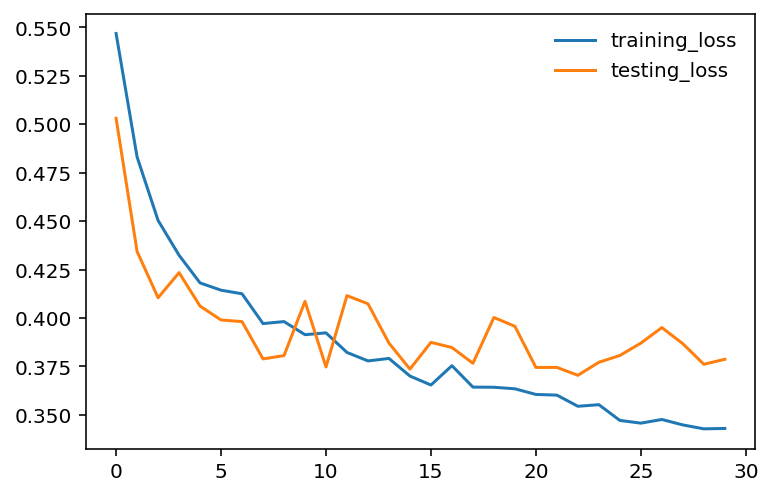

In [33]:
plt.plot(training_loss, label = 'training_loss')
plt.plot(testing_loss, label = 'testing_loss')
plt.legend(frameon = False)

In [34]:
## We can see that, now, with the dropout included, the training and testing
#  losses are not so divergent, which means that the overfitting problem
#  has been addressed to an extent. 

In [35]:
# Currently, accuracies of about 90% have been obtained, but, clearly, the losses
# are still decraesing, which means that running the process for more and more
# epochs will further improve accuracy.